In [27]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType, TimestampType, StringType
from pyspark.sql.window import Window
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.utils import AnalysisException
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib

# spark initialization
spark = SparkSession.builder.appName("gamedata").getOrCreate()
# load master database
hard_sales = spark.read.parquet("../database/parquet/hard_sales")
# hard_info_df = spark.read.parquet("../database/parquet/hard_info")

In [28]:
ps_launch_df = hard_sales.groupBy("delta_week").pivot("hw").sum("sum_units").sort("delta_week").select(
    "delta_week",
    "PS5", "PS4", "PS3"
)

In [29]:
ps_launch_df.show()

+----------+------+------+------+
|delta_week|   PS5|   PS4|   PS3|
+----------+------+------+------+
|         0|118085|322083| 88443|
|         1|160976|374780|131821|
|         2|201435|405546|169082|
|         3|213328|434410|199549|
|         4|224384|467751|243146|
|         5|241962|491889|313703|
|         6|255150|506925|390209|
|         7|265782|518978|466715|
|         8|276946|532012|534335|
|         9|284274|542141|567827|
|        10|301622|553833|593206|
|        11|327570|562513|614234|
|        12|341094|569400|634921|
|        13|363984|576787|657871|
|        14|389021|583653|678488|
|        15|422859|591663|700046|
|        16|445408|599014|746970|
|        17|483259|605541|773895|
|        18|517916|613785|793682|
|        19|580211|620896|812073|
+----------+------+------+------+
only showing top 20 rows



In [30]:
ps_launch = ps_launch_df.toPandas().set_index("delta_week")

<Axes: xlabel='delta_week'>

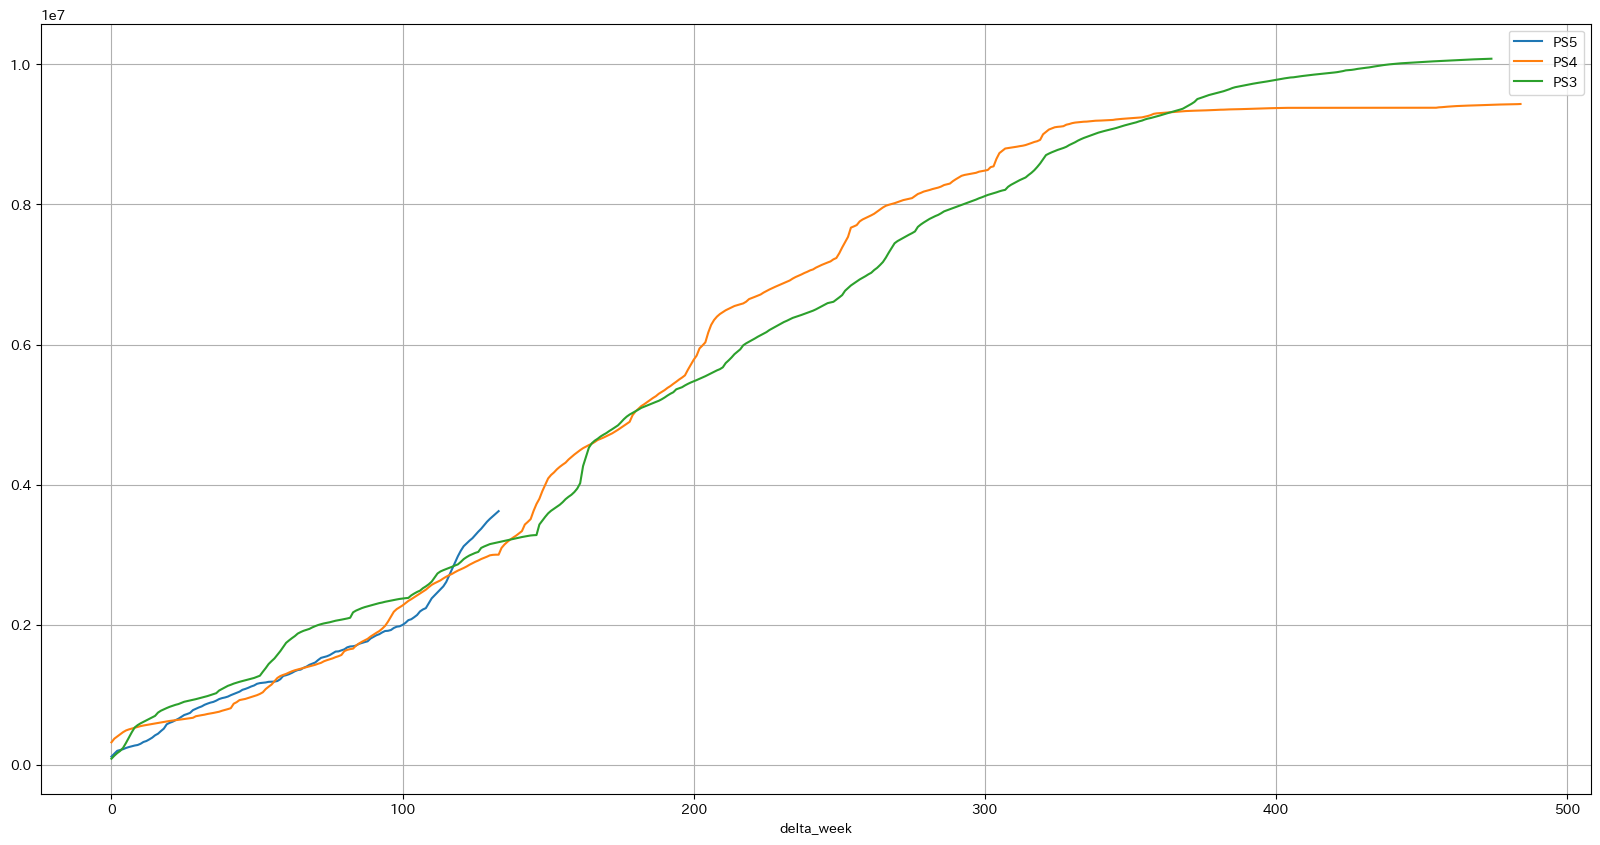

In [31]:
ps_launch.plot(figsize=(20, 10), grid=True)

In [32]:
ps5_launch_df = ps_launch_df.filter(F.col("PS5").isNotNull())

<Axes: xlabel='delta_week'>

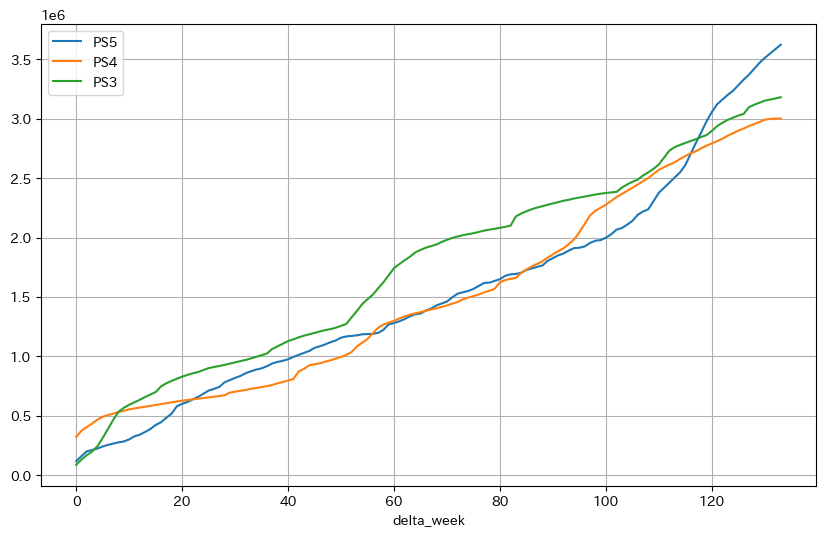

In [33]:
ps5_launch = ps5_launch_df.toPandas().set_index("delta_week")
ps5_launch.plot(figsize=(10, 6), grid=True)

In [34]:
ps5_launch_df.filter(F.col("delta_week") > 80).orderBy(F.col("delta_week")).show()

+----------+-------+-------+-------+
|delta_week|    PS5|    PS4|    PS3|
+----------+-------+-------+-------+
|        81|1678528|1642512|2090505|
|        82|1690968|1653070|2100614|
|        83|1694003|1659863|2177822|
|        84|1703184|1703235|2202656|
|        85|1727545|1731832|2221333|
|        86|1740906|1757182|2238287|
|        87|1753451|1778744|2252295|
|        88|1764645|1799594|2264262|
|        89|1803981|1832187|2276156|
|        90|1827281|1859337|2287081|
|        91|1850581|1885809|2298433|
|        92|1866236|1910325|2309785|
|        93|1891345|1944691|2318074|
|        94|1911637|1984980|2328875|
|        95|1914501|2045310|2337365|
|        96|1925681|2115906|2345415|
|        97|1955203|2186502|2353640|
|        98|1973279|2224788|2361946|
|        99|1978825|2251446|2369481|
|       100|1999122|2276271|2375380|
+----------+-------+-------+-------+
only showing top 20 rows



In [35]:
plt.close('all')


In [36]:
datetime.date(2017, 7, 29) - datetime.date(2014,2,22)

datetime.timedelta(days=1253)

In [37]:
datetime.date(2016, 9, 15) - datetime.date(2014,2,22)

datetime.timedelta(days=936)

In [38]:
datetime.date(2020, 11, 12) + datetime.timedelta(1000)
# スリム期待時期

datetime.date(2023, 8, 9)

In [39]:
datetime.datetime(2006, 11, 11) + datetime.timedelta(360)
# PS3 急上昇  なぞ

datetime.datetime(2007, 11, 6, 0, 0)

In [40]:
datetime.datetime(2009, 9, 3) - datetime.datetime(2006, 11, 11)
# PS3 slim発売

datetime.timedelta(days=1027)

In [41]:
datetime.datetime(2011, 8, 18) - datetime.datetime(2006, 11, 11)
# PS3値下げ

datetime.timedelta(days=1741)

In [42]:
datetime.date(2015, 9, 2) - datetime.date(2014, 2, 22)  # MGSV ファントムペイン

datetime.timedelta(days=557)

23/06/29 22:28:53 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 203004 ms exceeds timeout 120000 ms
23/06/29 22:28:53 WARN SparkContext: Killing executors is not supported by current scheduler.
23/06/29 22:28:54 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.B